In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from flows import PlanarFlowLayer, RadialFlowLayer
from efn_util import declare_theta

K = 1;
M = 100;
D = 2;
T = 1;

z0 = tf.placeholder(dtype=tf.float64, shape=(K,M,D,T));
_z0 = np.random.normal(0,1,[K,M,D,T]);

layers = [RadialFlowLayer('RadialFlow', D)];
num_layers = len(layers);
theta = declare_theta(layers);

for i in range(num_layers):
    layer = layers[i];
    layer.connect_parameter_network(theta[i]);

z = z0;
sum_log_det_jacobians = 0.0;
for i in range(num_layers):
    layer = layers[i];
    z, sum_log_det_jacobians = layer.forward_and_jacobian(z, sum_log_det_jacobians);


not param network
z (1, 100, 2, 1)
pre z0 (1, 2, 1)
z0 (1, 1, 2, 1)
d (1, 100, 2, 1)
r (1, 100, 1, 1)
hprime (1, 100, 1, 1)
ldj
(1, 100, 1, 1)
(1, 100)


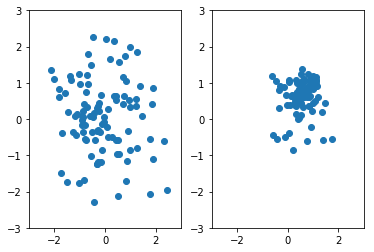

In [2]:
sess = tf.Session();
sess.run(tf.global_variables_initializer());
_z, sldj = sess.run([z, sum_log_det_jacobians], {z0:_z0});

maxval = 3;
plt.figure();
plt.subplot(1,2,1);
plt.scatter(_z0[0,:,0,0], _z0[0,:,1,0]);
plt.xlim([-maxval,maxval]);
plt.ylim([-maxval,maxval]);
plt.subplot(1,2,2);
plt.scatter(_z[0,:,0,0], _z[0,:,1,0]);
plt.xlim([-maxval,maxval]);
plt.ylim([-maxval,maxval]);
plt.show();

In [3]:
[z0_tf, alpha_tf, beta_tf] = layer.get_params();
z0_param, alpha, beta = sess.run([z0_tf, alpha_tf, beta_tf]);
print(z0_param, alpha, beta);

not param network
[[[1.]
  [1.]]] [[[1.]]] [[[-2.02513465]]]


In [4]:
print(_z0.shape, _z.shape);
print(_z[0,0,:,:], sldj[0,0]);

(1, 100, 2, 1) (1, 100, 2, 1)
[[0.45340595]
 [0.07504496]] -1.0324041041580614


In [6]:
_z01 = _z0[0,0,:,:];
d = _z01 - z0_param.T;
r = np.linalg.norm(d);
h = 1.0 / (alpha + r);
h_prime = -1.0 / np.square(alpha + r);

z_out = _z01 + beta*h*d;

abs_det_jac = (D-1)*np.log(1 + beta*h) + np.log(1 + beta*h + beta*h_prime*r);
print(z_out, abs_det_jac);

[[[0.45340595]
  [0.07504496]]] [[[-1.0324041]]]
